In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
happiness_score_2019 = pd.read_csv('data/2019.csv')

In [8]:
happiness_score_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
happiness_score_2019 = happiness_score_2019[['Country or region', 'Social support', 'Score']]
happiness_score_2019

,Country or region,Social support,Score
0,Finland,1.587,7.769
1,Denmark,1.573,7.600
2,Norway,1.582,7.554
3,Iceland,1.624,7.494
4,Netherlands,1.522,7.488
...,...,...,...
151,Rwanda,0.711,3.334
152,Tanzania,0.885,3.231
153,Afghanistan,0.517,3.203
154,Central African Republic,0.000,3.083


In [5]:
import matplotlib.pyplot as plt

$$\hat y = \beta_0 + x \beta_1 + \epsilon$$

More generally:
$$\hat y = \beta_0 + \sum_{i = 1}^{n} x_i \beta_i + \epsilon$$

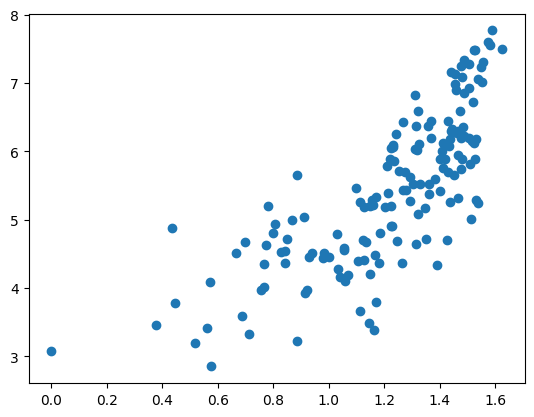

In [6]:
# plt.scatter(happiness_score_2019['Healthy life expectancy'], happiness_score_2019['Score'])
plt.scatter(happiness_score_2019['Social support'], happiness_score_2019['Score'])

# Linear Regression

In [7]:
train, test = train_test_split(happiness_score_2019, test_size=0.2)

In [8]:
beta_0 = 0
beta_1 = 5

In [9]:
import numpy as np

In [10]:
def loss(beta_0, beta_1, x, y, n):
    return sum((x * beta_1 - y + beta_0) ** 2) / (2 * n)

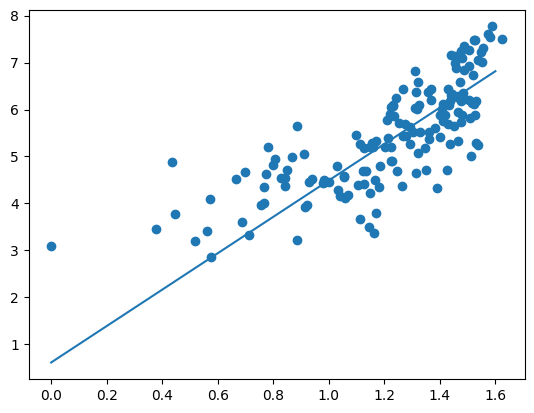

In [129]:
plt.scatter(happiness_score_2019['Social support'], happiness_score_2019['Score'])
sample_x = np.linspace(0, 1.6, num=20)
sample_y = [beta_0 + beta_1 * x for x in sample_x]
plt.plot(sample_x, sample_y)

In [92]:
loss(beta_0, beta_1, train['Social support'], train['Score'], train.shape[0])

0.6361183588709677

In [137]:
eh = np.linspace(-10, 10, num=50)
eh

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

In [ ]:
# https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
# https://medium.com/machine-learning-for-humans/supervised-learning-740383a2feab

In [135]:
losses = []

for e in eh:
    _loss = loss(e, beta_1, train['Social support'], train['Score'], train.shape[0])
    losses.append(_loss)

data = {'betas': eh, 'loss': losses}
losses_df = pd.DataFrame(data)
losses_df = losses_df.set_index(losses_df['betas'])
losses_df = losses_df.drop('betas', axis=1)
losses_df

,loss
betas,
-1000.000000,500734.210083
-959.183673,460720.924845
-918.367347,422373.612118
-877.551020,385692.271903
-836.734694,350676.904199
-795.918367,317327.509006
-755.102041,285644.086325
-714.285714,255626.636156
-673.469388,227275.158497


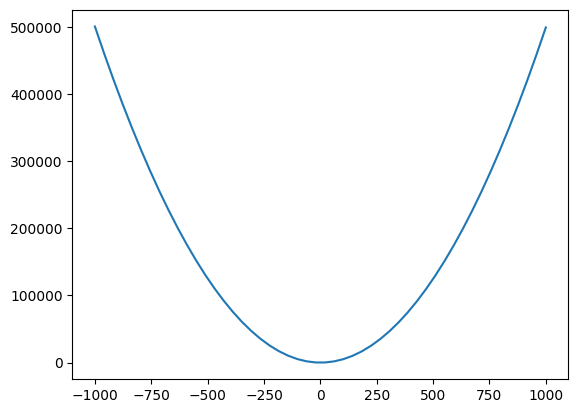

In [136]:
plt.plot(losses_df)

In [121]:
# Second iteration
beta_0 = 0.612245
beta_1 = 4.285714

In [128]:
# Third iteration
beta_1 = 3.877551
beta_0 = 0.612245

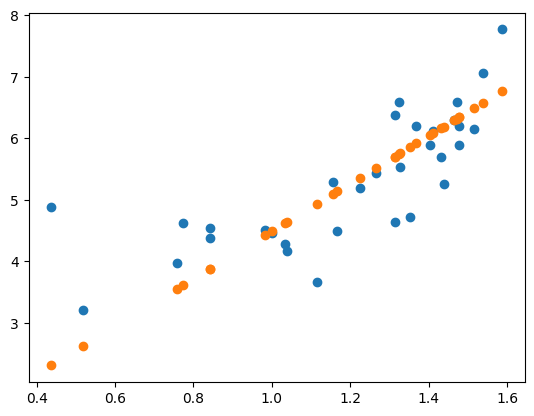

In [133]:
plt.scatter(test['Social support'], test['Score'])
plt.scatter([test['Social support']], [x * beta_1 + beta_0 for x in test['Social support']])

$$f(\beta_1, \beta_0) = \frac{\sum_1^n((\beta_1x_i + \beta_0) - y_i)^2}{2n}$$
$$\partial f(\beta_1, \beta_0) \frac{\sum_1^n((\beta_1x_i + \beta_0) - y_i)^2}{2n}$$